<a href="https://colab.research.google.com/github/mohzary/ML-Python-IBM-Course/blob/master/clustering/k_means_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Needed packages

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import io
from google.colab import files
%matplotlib inline

In [2]:
datafile = files.upload()


Saving Cust_Segmentation.csv to Cust_Segmentation.csv


In [3]:
for fn in datafile.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(datafile[fn])))

data_df = pd.read_csv(io.StringIO(datafile['Cust_Segmentation.csv'].decode('utf-8')))

User uploaded file "Cust_Segmentation.csv" with length 34276 bytes


In [4]:
data_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
Address            850 non-null object
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


<h2 id="pre_processing">Pre-processing</h2

In [6]:

df = data_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [7]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>

In [9]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 2 2 0 1 2 1 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 2 2 1 2 1 2 0 2 1 2 2 2 1 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 1 2 2 2 1 1 1 2
 2 2 2 2 1 2 1 1 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2
 2 2 2 2 2 2 1 2 1 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2 2 2 1 2 2 1 2 1 2 2 1 0 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 2 2 1 1 2 1 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 2
 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 1 2
 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 0 2 2 2 1 2 1 1 1 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 1 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 0
 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 1 2 0 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 1 2 

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.

In [10]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [11]:
#We can easily check the centroid values by averaging the features in each cluster.
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


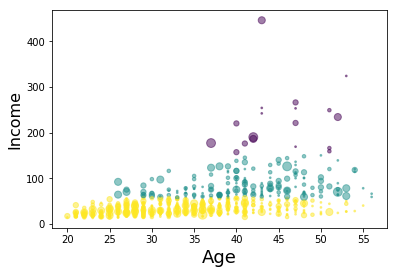

In [12]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

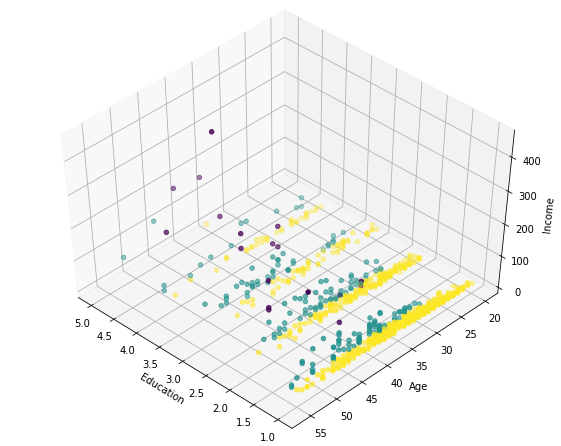

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))